# everywhereml.data.preprocessing.MinMaxScaler

See [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [1]:
import sys
sys.path.append('../../../')

from everywhereml.data.preprocessing import MinMaxScaler
from everywhereml.data.plot import scatter
from sklearn.datasets import load_iris

Original range
Min 0.1
Max 7.9


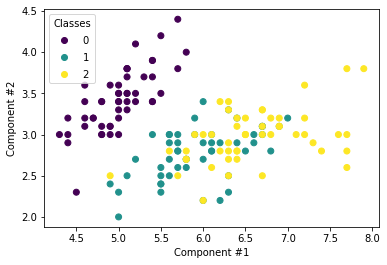

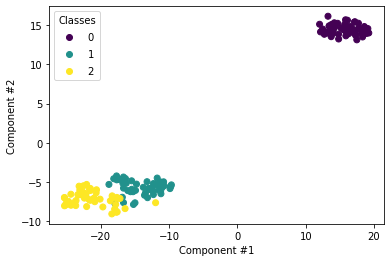

In [2]:
"""
Load Iris
"""
X, y = load_iris(return_X_y=True)

print('Original range')
print('Min', X.min())
print('Max', X.max())

scatter(X, hue=y)
scatter(X, hue=y, tsne=2)

Transformed range
Min [0. 0. 0. 0.]
Max [1. 1. 1. 1.]


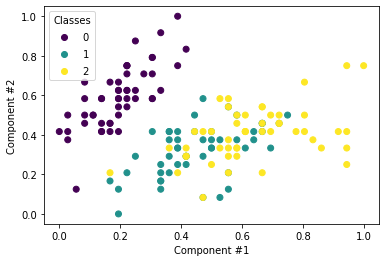

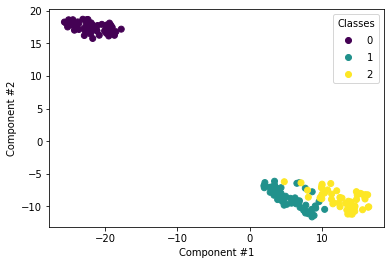

In [3]:
"""
Xt will hold values in the range [0, 1]
"""
Xt, yt = MinMaxScaler().fit_transform(X, y)

print('Transformed range')
print('Min', Xt.min(axis=0))
print('Max', Xt.max(axis=0))

scatter(Xt, hue=yt)
scatter(Xt, hue=yt, tsne=2)

Transformed range
Min [0.53846154 0.24358974 0.11538462 0.        ]
Max [1.         0.55128205 0.87179487 0.30769231]


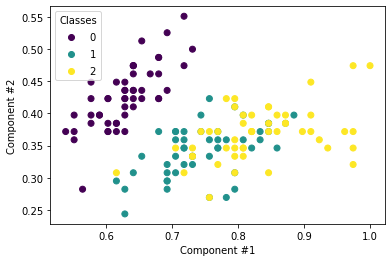

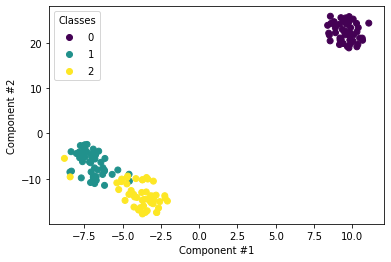

In [4]:
"""
You can also scale using a global min/max
"""
Xt, yt = MinMaxScaler(num_features=0).fit_transform(X, y)

print('Transformed range')
print('Min', Xt.min(axis=0))
print('Max', Xt.max(axis=0))

scatter(Xt, hue=yt)
scatter(Xt, hue=yt, tsne=2)

In [5]:
"""
Port to C++
"""
print(MinMaxScaler().fit(X, y).port(language='cpp'))

#ifndef UUID4855076848
#define UUID4855076848

namespace EverywhereML {
    namespace Data {
        namespace Preprocessing {
            
                class MinMaxScaler {
                    public:
                        

                        /**
                         * input_dim  = 4
                         * output_dim = 0
                         */
                        bool transform(float *source) {
                            
    for (uint16_t i = 0; i < 4; i++) {
        
            source[i] = (source[i] - m[i % 4]) * invRange[i % 4];
        
    }



                            return true;
                        }

                        

                    protected:
                        

                        

    
        float m[4] = {4.300000000, 2.000000000, 1.000000000, 0.100000000};
        float invRange[4] = {0.277777778, 0.416666667, 0.169491525, 0.416666667};
    


                };
            
        }
    }
}

#endif


In [6]:
"""
Port to Javascript (ES6)
"""
print(MinMaxScaler().fit(X, y).port(language='js', dialect='es6'))

export default class MinMaxScaler {
    /**
     * Constructor
     */
     constructor() {
        
    this.m = [4.300000000, 2.000000000, 1.000000000, 0.100000000]
    this.invRange = [0.277777778, 0.416666667, 0.169491525, 0.416666667]

     }

    /**
     * input_dim  = 4
     * output_dim = 0
     * @return Array|false
     */
    transform(source) {
        const $this = this;

        
    
        return source.map((x, i) => (x - $this.m[i % 4]) * $this.invRange[i % 4])
    

    }
}


In [7]:
"""
Port to PHP
"""
print(MinMaxScaler().fit(X, y).port(language='php'))

<?php


class MinMaxScaler {
    
    /**
     * @array min values
     */
    protected $m;

    /**
     * @array inverse of ranges
     */
    protected $invRange;


    /**
     * Constructor
     */
    public function __construct() {
        
    $this->m = [4.300000000, 2.000000000, 1.000000000, 0.100000000];
    $this->invRange = [0.277777778, 0.416666667, 0.169491525, 0.416666667];

    }

    /**
     * input_dim  = 4
     * output_dim = 0
     * @return array|false
     */
    public function transform(array $source) {
        
    
        return array_map(function(float $x, int $i) {
            return ($x - $this->m[$i % 4]) * $this->invRange[$i % 4];
        }, $source);
    

    }

    
};
